<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Performing_K-Nearest-Neighbors_and_Naive_Bayes_Classification_using_Scikit-learn/blob/master/Week9_IP_Precy_Mae_(Dataset_2_Naive_Bayes_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Naive Bayes Classifier


---





# **1. Defining the Question**

## a) Specifying the Question
Creating a Naive Bayes classifier that predicts the class of an email (spam or not) given various features of the email.

## b) Defining the Metric for Success
Improving the Naive Bayes classifier to its best.

## c) Understanding the context
We are interested in predicting the class of email if it is spam or not.

## d) Recording the Experimental Design
###1) Business Understanding:
The goal is to be able to predict the class of an email, if it is spam or not.

### 2) Reading the data to a pandas dataframe
3) Checking our data:
Understanding the components of our dataset. The shape, data types, top and tail of our dataset.

### 4) Data cleaning:
Removing duplicates

### 5) EDA:
Visualizing and understanding data using univariate (pandas profiling) analysis.

### 6) Implementing the solution:
Performing the Niave Bayes classification model and improving it.

### 7) Conclusion:
Which is the best method to improve the model

### 8)Challenging the solution:
How can the solution be improved, does it have hitches

# **2. Data cleaning and preparation**

## Loading libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('/content/spambase_csv (1).csv')
data.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# Show the number of rows and columns in our dataset
data.shape

(4601, 58)

In [4]:
# Checking our column datatypes
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

All our variables have the correct data types.

In [5]:
# Checking for missing data
print("Missing values in our dataset")
print("")
print(data.isnull().sum())

Missing values in our dataset

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq

Our dataset has no missing values.

In [6]:
# Checking for question marks per column using the unique formula
for column in data.columns:
  print('\n')
  print( data[column].nunique())
  print(data[column].unique())



142
[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]


171
[6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4.400e-01 9.400e-01 1.800e-01 7.200e-01 7.900e-01 6.

Our dataset seems to be continuous therefore a gaussian variation will be suitable.

In [7]:
# Checking for duplicates
data[data.duplicated()].head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,2.59,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,2.59,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1


In [8]:
# Checking for the number of duplicates
len(data[data.duplicated()])

391

We have 391 duplicates, which are relatively few so we will drop them.

In [9]:
# Dropping our duplicates
data.drop_duplicates(inplace= True)

All our duplicates are dropped.

# **2. Perform EDA**

## Univariate Analysis

In [10]:
# Univariate analysis using pandas profiling
!pip install pandas-profiling -U

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [11]:
# Finalizing the report
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='NaiveBayesReport.html')

In [13]:
# Viewing the report
prof

In [14]:
# Viewing our statistical summary
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Report Summary


---
* All our variables have a minimum of zero.
* All our variables are numerical except one.
* The report was overloaded and took too long to create.
* The report was also unable to upload to github


# **3. Split Dataset**

In [15]:
# Get dummies for our dependent variable
data['class'].replace([1, 0],[1,0],inplace=True)

In [17]:
# Scaling our numerical features to a standard normal distribution
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']

data[columns_to_scale]= StandardScaler.fit_transform(data[columns_to_scale])
data.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,0.084763,-0.315759,-0.176899,-0.185016,0.082979,-0.325939,2.035313,0.119664,-0.168068,0.130489,-0.122848,-0.286433,-0.210737,-0.34241,-0.3085,-0.208346,-0.240163,-0.170587,-0.236121,-0.164102,-0.149368,-0.179822,-0.151691,-0.203473,-0.257148,-0.338037,-0.061566,-0.187653,-0.191804,-0.130233,-0.178329,-0.210366,-0.131987,-0.306107,-0.204025,-0.073094,-0.116407,-0.16001,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310,1
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,0.832571,0.254753,1.785947,0.429994,0.393121,-0.142743,-0.172972,0.168638,0.990434,-0.168068,0.678689,-0.122848,0.937611,0.785391,-0.34241,-0.3085,-0.208346,-0.240163,-0.170587,-0.236121,-0.164102,-0.149368,-0.179822,-0.151691,-0.203473,-0.257148,-0.173120,-0.061566,-0.187653,-0.191804,-0.130233,-0.178329,-0.210366,-0.131987,-0.306107,-0.204025,-0.073094,-0.116407,-0.16001,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142,1


In [18]:
# Splitting our dataset
X=data.loc[:, data.columns != 'class'] # Independent variables

y= data.iloc[:, data.columns == 'class'] # Dependent variable


# **4. Modelling**


---
###**Naive Bayes Assumption**
* The effect of a particular feature in a class is independent of others.

### **Gaussian Naive Bayes Assumption**
* Since our predictors are continuous and not discrete, we assume that our values are sampled from a gaussian distribution.


## Base model

In [19]:
# Train test split our variables
from sklearn.model_selection import train_test_split
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [20]:
# Importing naive bayes gaussian 
from sklearn.naive_bayes import GaussianNB
# Fitting our  our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# Predicting our test predictors
predicted = model.predict(X_test)

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8076009501187649


OUr model is 80% accurate. Let us see if the model can improve.

In [23]:
# Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted))

[[365 150]
 [ 12 315]]


This means that our model has predicted (365+315) correctly and (12+150) falsely.

In [24]:
# Classification report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       515
           1       0.68      0.96      0.80       327

    accuracy                           0.81       842
   macro avg       0.82      0.84      0.81       842
weighted avg       0.86      0.81      0.81       842



# **5. improving our model**




In [25]:
# Looking if there's any correlation
data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0

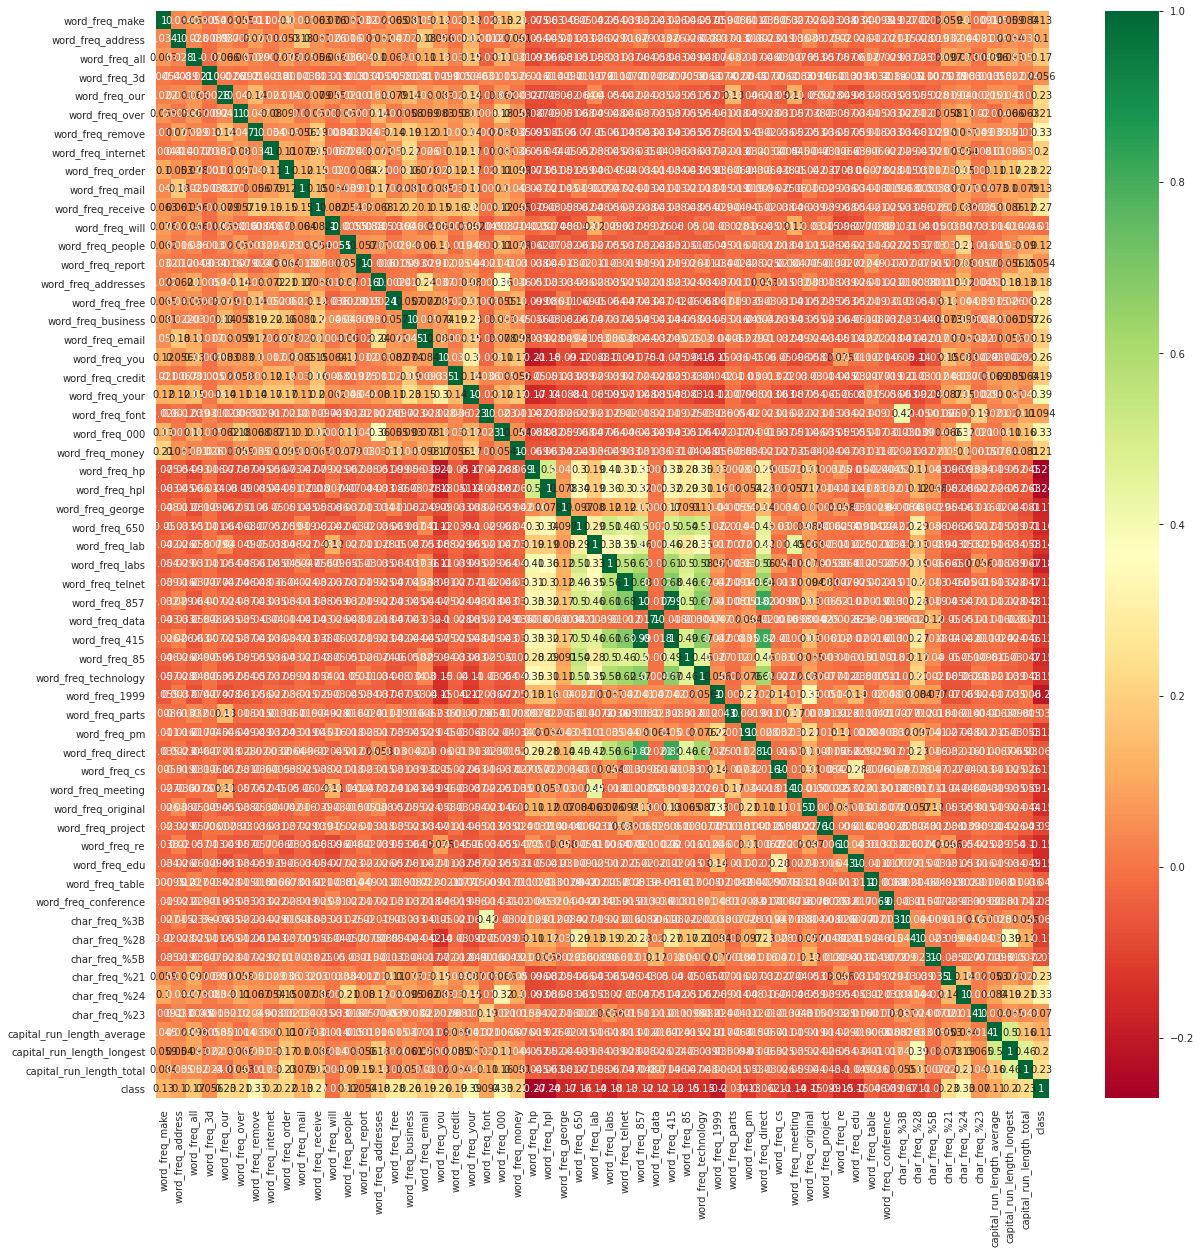

In [26]:
# Taking a look at the correlations in our dataset
corrmat= data.corr()
top_corr_features= corrmat.index
#
plt.figure(figsize=(20,20))
# Plot heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [27]:
# To drop columns that have a high correlation of greater than 0.8
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
# Drop features 
data.drop(data[to_drop], axis=1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,0.084763,-0.315759,-0.176899,-0.185016,0.082979,-0.325939,2.035313,0.119664,-0.168068,0.130489,-0.122848,-0.286433,-0.210737,-0.34241,-0.3085,-0.208346,-0.240163,-0.170587,-0.236121,-0.164102,-0.149368,-0.179822,-0.203473,-0.257148,-0.338037,-0.061566,-0.187653,-0.130233,-0.178329,-0.210366,-0.131987,-0.306107,-0.204025,-0.073094,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310,1
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,0.832571,0.254753,1.785947,0.429994,0.393121,-0.142743,-0.172972,0.168638,0.990434,-0.168068,0.678689,-0.122848,0.937611,0.785391,-0.34241,-0.3085,-0.208346,-0.240163,-0.170587,-0.236121,-0.164102,-0.149368,-0.179822,-0.203473,-0.257148,-0.173120,-0.061566,-0.187653,-0.130233,-0.178329,-0.210366,-0.131987,-0.306107,-0.204025,-0.073094,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142,1
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,1.755758,-0.130557,0.072248,-0.176899,7.041695,-0.243064,-0.194824,1.554782,-0.202634,0.464941,-0.261083,-0.122848,3.015639,-0.071742,-0.34241,-0.3085,-0.208346,-0.240163,-0.170587,-0.236121,-0.164102,-0.149368,-0.179822,-0.203473,-0.257148,-0.338037,-0.061566,-0.187653,-0.130233,-0.178329,0.307224,-0.131987,-0.248734,-0.139383,-0.073094,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179,1
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,1.375622,-0.289213,0.686593,-0.176899,-0.185016,0.070439,-0.325939,-0.348856,0.826458,-0.168068,-0.435115,-0.122848,-0.286433,-0.210737,-0.34241,-0.3085,-0.208346,-0.240163,-0.170587,-0.236121,-0.164102,-0.149368,-0.179822,-0.203473,-0.257148,-0.338037,-0.061566,-0.187653,-0.130233,-0.178329,-0.210366,-0.131987,-0.306107,-0.204025,-0.073094,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,1.375622,-0.289213,0.686593,-0.176899,-0.185016,0.070439,-0.325939,-0.348856,0.826458,-0.168068,-0.435115,-0.122848,-0.286433,-0.210737,-0.34241,-0.3085,-0.208346,-0.240163,-0.170587,-0.236121,-0.164102,-0.149368,-0.179822,-0.203473,-0.257148,-0.338037,-0.061566,-0.187653,-0.130233,-0.178329,-0.210366,-0.131987,-0.306107,-0.204025,-0.073094,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.685518,-0.248027,0.637104,-0.046644,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,1.490008,-0.315759,-0.176899,-0.185016,-0.318305,-0.325939,-0.348856,-0.62

The code above has dropped two columns that were correlated.

In [28]:
# Performing feature selection
X= data.loc[:, data.columns != 'class'] # Independent variables

y= data.iloc[:, data.columns == 'class'] # Dependent variable
from sklearn.ensemble import ExtraTreesRegressor
# Initialize
model=ExtraTreesRegressor()
model.fit(X,y)

# Showing the feature importance rates
print(model.feature_importances_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.00507541 0.00604319 0.01181439 0.00214287 0.03271812 0.00962071
 0.09488564 0.01426177 0.00676729 0.00863001 0.02002647 0.01028055
 0.00419185 0.00309363 0.00253636 0.05047617 0.01823186 0.0103247
 0.02552339 0.00598648 0.10069625 0.00401579 0.04904599 0.0234078
 0.06409776 0.0186191  0.03020788 0.00687465 0.00243165 0.00803485
 0.00161167 0.00041503 0.00338947 0.0004202  0.00308848 0.00479911
 0.01325285 0.00098812 0.00349851 0.00122525 0.00132054 0.01079732
 0.00178284 0.00257217 0.01231468 0.02792162 0.00045753 0.00152429
 0.00561384 0.00989047 0.00287071 0.08194808 0.06994276 0.0032829
 0.03024579 0.02896386 0.02579933]


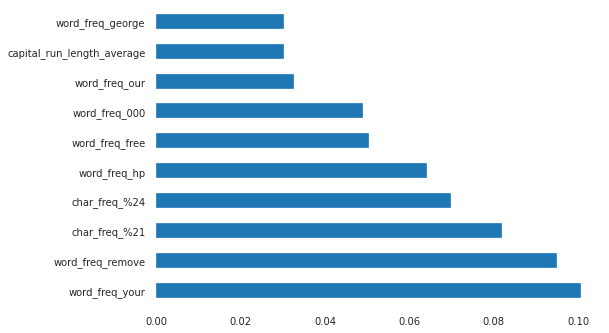

In [29]:
# To plot graph of the top ten features that influence hypotyroidsm
feat_importances= pd.Series(model.feature_importances_, index= X.columns)
# You can take the top five important features
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The ones shown above are the most relevant features influencing the class of the word.

In [30]:
# Selecting the features above
cols=['word_freq_remove','class','word_freq_your','char_freq_%24','char_freq_%21','word_freq_hp', 'word_freq_free', 'word_freq_000','word_freq_our','capital_run_length_average','word_freq_george']
df=data[cols]
df.head()

,word_freq_remove,class,word_freq_your,char_freq_%24,char_freq_%21,word_freq_hp,word_freq_free,word_freq_000,word_freq_our,capital_run_length_average,word_freq_george
0,-0.295731,1,0.130489,-0.317325,0.589246,-0.34241,0.082979,-0.286433,-0.007737,-0.049117,-0.208346
1,0.232922,1,0.678689,0.433676,0.107759,-0.34241,-0.142743,0.937611,-0.269470,-0.008143,-0.208346
2,0.182574,1,-0.261083,0.450365,-0.006090,-0.34241,-0.243064,3.015639,1.315470,0.133876,-0.208346
3,0.484661,1,-0.435115,-0.317325,-0.170935,-0.34241,0.070439,-0.286433,0.443026,-0.055724,-0.208346
4,0.484661,1,-0.435115,-0.317325,-0.173306,-0.34241,0.070439,-0.286433,0.443026,-0.055724,-0.208346


In [31]:
# Separating dependent and independent variables
X= df.loc[:, df.columns != 'class'] # Independent variables

y= df.iloc[:, df.columns == 'class'] # Dependent variable

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
# Fitting our gaussian  model
# 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# Predicting our test predictors
pred = model.predict(X_test)

In [35]:
# Showing our model accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8479809976247031


Our model has improved substancially to 84% which is a really good improvement.

In [36]:
# Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
# Classification report
print(classification_report(y_test,predicted))

[[454  41]
 [ 87 260]]
              precision    recall  f1-score   support

           0       0.61      0.46      0.53       495
           1       0.43      0.58      0.49       347

    accuracy                           0.51       842
   macro avg       0.52      0.52      0.51       842
weighted avg       0.54      0.51      0.51       842



* The confusion matrix above shows that our model has had (454+ 260) correct predictions and (41+ 87) false predictions.

*  Support is the number of occurrences of each class label in the *y_test* dataset, class-0 had 495 occurrences in the y test and class -1 had 347 occurrences in the y test.



# **6. Conclusion**


---
* Our model has improved by a 4% difference simply by scaling our features, removing correlated features and selecting only the relevant features.


# 7. Challenging the Solution


---

Our model has performed well.